In [1]:
import os
import pandas as pd

read_path = os.getcwd()
df_url = read_path + '/Output/SilverDataframe.csv'

In [ ]:
#import warnings
#warnings.filterwarnings("ignore")

In [2]:
#One dataframe per country

df = pd.read_csv(df_url)
corr_df = pd.DataFrame()
corr_df.index.names = ['Country']
aux_df = pd.DataFrame()

#List all the countries, none repeated
countries = set(df['Country'].to_list())

country_dict = {}
corr_dict = {}

for country in countries:

    #Get the DataFrame for a given country
    country_df = df.loc[df['Country'] == country]

    #Correlation matrix for that country
    country_corr_df = country_df.corr()

    #Trim it into a single row
    country_corr_df = country_corr_df.rename(columns = {'GDP': country}).drop(index = ['Year', 'GDP'])

    #Add the row to a new DataFrame with the correlations for each country
    corr_df = pd.concat([corr_df, country_corr_df[country]], axis = 1)

#Transpose the resulting DataFrame to have the desired format and show it
corr_df = corr_df.transpose()
corr_df

#corr_df.to_csv(read_path + '/Output/corr.csv')


,AgriShareGDP,CreditToAgriFishForest,EmploymentRural,TotalAgri,% Soldiers,Birth Rate,Death Rate,Homicides,Life Expectancy,Maternal Death Risk,...,% Population Growth,% Rural Population,Civil Liberties,Freedom of Expression,% Healthcare Investment,% Employment Industry,% Education Expenditure,% Men Employment,% Women Employment,Population
Aruba,0.374165,-0.603524,NaN,NaN,NaN,-0.781544,0.830859,NaN,0.854511,NaN,...,-0.802325,0.818422,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.903113
Benin,0.558550,-0.286368,NaN,NaN,0.170007,-0.991869,-0.966781,NaN,0.975262,-0.985662,...,-0.920561,-0.991571,0.577200,-0.775903,-0.672851,0.213531,0.295571,NaN,NaN,0.992396
Turkmenistan,-0.916581,NaN,NaN,-0.346547,0.651004,0.499399,-0.945071,NaN,0.972749,-0.909132,...,0.886601,-0.949027,0.858904,0.688642,-0.827310,0.480286,NaN,NaN,NaN,0.950749
Jordan,0.929244,-0.828580,NaN,0.979891,-0.925262,-0.969768,-0.750168,NaN,0.987968,-0.989961,...,0.044476,-0.992862,0.573174,0.940235,0.116714,-0.936668,NaN,NaN,NaN,0.994118
Belgium,-0.929181,0.322773,0.624761,0.740459,-0.792708,-0.133794,-0.812403,-0.803133,0.905131,-0.727397,...,0.486578,-0.876868,-0.389193,0.412971,0.855358,-0.808523,NaN,-0.701513,0.952283,0.850310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Luxembourg,-0.908405,NaN,0.701596,0.874445,-0.802340,-0.881778,-0.895747,-0.462688,0.947738,-0.930404,...,0.820628,-0.965204,NaN,NaN,-0.703552,-0.961775,NaN,-0.567939,0.944644,0.898705
Morocco,-0.421513,NaN,NaN,0.864131,-0.984657,-0.778574,-0.977643,-0.418194,0.988583,-0.976531,...,0.696034,-0.946684,0.498563,0.485657,0.843802,0.811457,NaN,NaN,NaN,0.937438
Portugal,-0.937049,NaN,-0.519219,0.941841,-0.364885,-0.684102,0.024278,-0.087743,0.660173,-0.715156,...,-0.633610,-0.680719,-0.718688,-0.058586,-0.511585,-0.676486,-0.726017,-0.624523,-0.426583,0.303975
Madagascar,-0.856914,NaN,NaN,0.645772,-0.892131,-0.962947,-0.957361,NaN,0.955664,-0.963204,...,-0.967226,-0.944561,-0.334297,-0.278199,0.012878,0.718184,0.500264,NaN,NaN,0.943587


In [4]:
#Clean the data deleting rows or columns with too many missing values
clean_corr_df = corr_df

#Indicators with no correlations
clean_corr_df = corr_df.dropna(axis = 'columns', how = 'all')
clean_corr_df

#clean_corr_df = clean_corr_df.dropna(axis = 'rows', thresh = 10)

cols = set(corr_df.columns) - set(clean_corr_df.columns)
print(cols)
clean_corr_df

set()


,AgriShareGDP,CreditToAgriFishForest,EmploymentRural,TotalAgri,% Soldiers,Birth Rate,Death Rate,Homicides,Life Expectancy,Maternal Death Risk,...,% Population Growth,% Rural Population,Civil Liberties,Freedom of Expression,% Healthcare Investment,% Employment Industry,% Education Expenditure,% Men Employment,% Women Employment,Population
Aruba,0.374165,-0.603524,NaN,NaN,NaN,-0.781544,0.830859,NaN,0.854511,NaN,...,-0.802325,0.818422,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.903113
Benin,0.558550,-0.286368,NaN,NaN,0.170007,-0.991869,-0.966781,NaN,0.975262,-0.985662,...,-0.920561,-0.991571,0.577200,-0.775903,-0.672851,0.213531,0.295571,NaN,NaN,0.992396
Turkmenistan,-0.916581,NaN,NaN,-0.346547,0.651004,0.499399,-0.945071,NaN,0.972749,-0.909132,...,0.886601,-0.949027,0.858904,0.688642,-0.827310,0.480286,NaN,NaN,NaN,0.950749
Jordan,0.929244,-0.828580,NaN,0.979891,-0.925262,-0.969768,-0.750168,NaN,0.987968,-0.989961,...,0.044476,-0.992862,0.573174,0.940235,0.116714,-0.936668,NaN,NaN,NaN,0.994118
Belgium,-0.929181,0.322773,0.624761,0.740459,-0.792708,-0.133794,-0.812403,-0.803133,0.905131,-0.727397,...,0.486578,-0.876868,-0.389193,0.412971,0.855358,-0.808523,NaN,-0.701513,0.952283,0.850310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Luxembourg,-0.908405,NaN,0.701596,0.874445,-0.802340,-0.881778,-0.895747,-0.462688,0.947738,-0.930404,...,0.820628,-0.965204,NaN,NaN,-0.703552,-0.961775,NaN,-0.567939,0.944644,0.898705
Morocco,-0.421513,NaN,NaN,0.864131,-0.984657,-0.778574,-0.977643,-0.418194,0.988583,-0.976531,...,0.696034,-0.946684,0.498563,0.485657,0.843802,0.811457,NaN,NaN,NaN,0.937438
Portugal,-0.937049,NaN,-0.519219,0.941841,-0.364885,-0.684102,0.024278,-0.087743,0.660173,-0.715156,...,-0.633610,-0.680719,-0.718688,-0.058586,-0.511585,-0.676486,-0.726017,-0.624523,-0.426583,0.303975
Madagascar,-0.856914,NaN,NaN,0.645772,-0.892131,-0.962947,-0.957361,NaN,0.955664,-0.963204,...,-0.967226,-0.944561,-0.334297,-0.278199,0.012878,0.718184,0.500264,NaN,NaN,0.943587


In [4]:
#Countries still with not enough indicators
#How many countries would remain depending on the threshold we use for indicators?

dict_count = {}

n_indicators = len(clean_corr_df.columns)

for i in range(0, n_indicators + 1):
    dict_count[i] = 0

for country in clean_corr_df.index:
    count = clean_corr_df.loc[country].count()
    dict_count[count] += 1

dict_count

i = n_indicators - 1
while i >= 0:
    dict_count[i] += dict_count[i + 1]
    i -= 1
dict_count

min = max(dict_count.values()) * 0.8
for i in range(1, len(dict_count)):
    if dict_count[i] < min:
        threshold = dict_count[i]
        break
    i += i


#print(len(dict_count))
print(min)
print(i)
print(threshold)

123.2
18
102


In [6]:
#What countries would be deleted?
df_count = pd.DataFrame()
print(df_count)
for country in corr_df.index:
    count = corr_df.loc[country].count()
    country_series = pd.Series({'Country': country, 'Indicators': count})
    df_count = pd.concat([df_count, country_series], axis = 1, ignore_index = True)
    #df_count = df_count.append({'Country': country, 'Indicators': count}, ignore_index = True)

df_count = df_count.transpose()
print(df_count)

print(list(df_count['Country']))

import plotly.express as px

fig = px.choropleth(df_count, locations="Country", locationmode='country names', 
                     color="Indicators", hover_name="Country",projection="mercator",
                     color_continuous_scale='Reds',
                 width=700, height=500)
fig.update(layout_coloraxis_showscale=True)

fig.show()

#grp = cases.groupby(['Country/Region'])[['Confirmed', 'Deaths', 'Recovered']].max()
#grp = grp.reset_index()
#grp['Country'] = grp['Country/Region']
""" 
fig = px.choropleth(grp, locations="Country", locationmode='country names', 
                     color="Confirmed", hover_name="Country/Region",hover_data = [grp.Recovered,grp.Deaths],projection="mercator",
                     color_continuous_scale='Reds',
                 width=700, height=500)
fig.update(layout_coloraxis_showscale=True) """

Empty DataFrame
Columns: []
Index: []
          Country Indicators
0           Aruba          8
1           Benin         16
2    Turkmenistan         15
3          Jordan         16
4         Belgium         20
..            ...        ...
171    Luxembourg         17
172       Morocco         16
173      Portugal         20
174    Madagascar         16
175       Eritrea         13

[176 rows x 2 columns]
['Aruba', 'Benin', 'Turkmenistan', 'Jordan', 'Belgium', 'Nepal', 'Jamaica', 'North Macedonia', 'India', 'Norway', 'Cuba', 'Rwanda', 'Sweden', 'Kiribati', 'Belize', 'Tunisia', 'Dominican Republic', 'Switzerland', 'Antigua and Barbuda', 'Zimbabwe', 'Gabon', 'Myanmar', 'Estonia', 'Libya', 'New Caledonia', 'Albania', 'French Polynesia', 'Malta', 'Ecuador', 'Bahrain', 'Tuvalu', 'Suriname', 'Zambia', 'Papua New Guinea', 'Sierra Leone', 'Finland', 'Cambodia', 'Ireland', 'Kenya', 'Indonesia', 'Namibia', 'Puerto Rico', 'Serbia', 'Cyprus', 'Argentina', 'Singapore', 'Mexico', 'Vanuatu', 'Malawi

' \nfig = px.choropleth(grp, locations="Country", locationmode=\'country names\', \n                     color="Confirmed", hover_name="Country/Region",hover_data = [grp.Recovered,grp.Deaths],projection="mercator",\n                     color_continuous_scale=\'Reds\',\n                 width=700, height=500)\nfig.update(layout_coloraxis_showscale=True) '

In [8]:
#corr_dict = {}

cor=country_dict['Spain'].corr()['GDP'].to_list()
print(cor)
#Correlations and all



[0.9460240087961991, nan, nan, -0.9048494574097632, -0.12371854797069115, 0.12270205658937397, 1.0, -0.8917876557640774, 0.9327389988156117, -0.7463321974728991, -0.8632633962853252, -0.8585387041760761, -0.6994868034513462, 0.4611675663625849, -0.7157045451297489, 0.9400522496239347, -0.14643221388473815, 0.8469271128467977, -0.8209052177881189, -0.05348730973793577, -0.8693777236398561, -0.550825088019285, 0.2409357422835047, 0.5494079426157892, 0.48500564715190936, 0.8110401686027279, -0.7196721763643545, 0.9697921444604378, 0.9714183010547782, 0.18554083188868983, 0.004097463156543827, 0.9479860774850387, 0.9719617821351871]


In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
from sklearn.cluster import OPTICS, cluster_optics_dbscan
from sklearn.preprocessing import normalize, StandardScaler

[-1 -1 -1 -1  0  0  0  0  0  0  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  2  2  2  2
  2  2  2  2  2  2  2  2  2  2 -1 -1  3  3  3  3  3  3  3 -1 -1  4  4  4
  4  4  4  4  4 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  5  5  5  5  5 -1 -1 -1
 -1 -1  6  6  6  6  6 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
216


Text(0.5, 1.0, 'OPTICS Clustering')

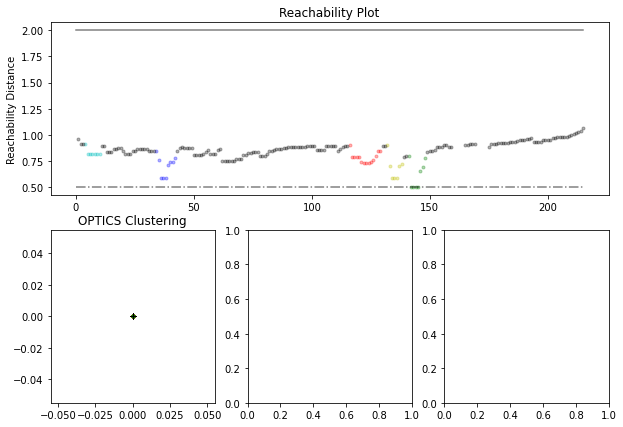

In [118]:
scaler = StandardScaler()
corr_df = corr_df.fillna(method ='ffill')
corr_df = corr_df.fillna(value = 0)
#print(corr_df)
df_scaled = scaler.fit_transform(corr_df)
df_normalized = normalize(df_scaled)
df_normalized = pd.DataFrame(df_normalized)
df_normalized.columns = corr_df.columns
#df_normalized.head()
#print(df_scaled)

optics_model = OPTICS(min_samples = 5, xi = 0.05, min_cluster_size = 5)
optics_model.fit(df_normalized)

labels1 = cluster_optics_dbscan(reachability = optics_model.reachability_,
core_distances = optics_model.core_distances_,
ordering = optics_model.ordering_, eps = 0.5)

space = np.arange(len(df_normalized))
reachability = optics_model.reachability_[optics_model.ordering_]
labels = optics_model.labels_[optics_model.ordering_]
print(labels)
print(len(labels))

plt.figure(figsize = (10, 7))
G = gridspec.GridSpec(2, 3)
ax1 = plt.subplot(G[0, :])
ax2 = plt.subplot(G[1, 0])
ax3 = plt.subplot(G[1, 1])
ax4 = plt.subplot(G[1, 2])

# Plotting the Reachability-Distance Plot
colors = ['c.', 'b.', 'r.', 'y.', 'g.']
for Class, colour in zip(range(0, 5), colors):
    Xk = space[labels == Class]
    Rk = reachability[labels == Class]
    ax1.plot(Xk, Rk, colour, alpha = 0.3)
ax1.plot(space[labels == -1], reachability[labels == -1], 'k.', alpha = 0.3)
ax1.plot(space, np.full_like(space, 2., dtype = float), 'k-', alpha = 0.5)
ax1.plot(space, np.full_like(space, 0.5, dtype = float), 'k-.', alpha = 0.5)
ax1.set_ylabel('Reachability Distance')
ax1.set_title('Reachability Plot')
  
# Plotting the OPTICS Clustering
colors = ['c.', 'b.', 'r.', 'y.', 'g.']
for Class, colour in zip(range(0, 5), colors):
    Xk = df_normalized[optics_model.labels_ == Class]
    ax2.plot(Xk.iloc[:, 0], Xk.iloc[:, 1], colour, alpha = 0.3)
      
ax2.plot(df_normalized.iloc[optics_model.labels_ == -1, 0],
        df_normalized.iloc[optics_model.labels_ == -1, 1],
       'k+', alpha = 0.1)
ax2.set_title('OPTICS Clustering')
  

In [ ]:
""" #MORRALLA

# K-MEANS CLUSTERING
# Importing Modules
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# Loading dataset
iris_df = datasets.load_iris()

# Declaring Model
model = KMeans(n_clusters=3)

# Fitting Model
model.fit(iris_df.data)

# Predicitng a single input
predicted_label = model.predict([[7.2, 3.5, 0.8, 1.6]])

# Prediction on the entire data
all_predictions = model.predict(iris_df.data)

# Printing Predictions
print(predicted_label)
print(all_predictions)


# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :3]  # we only take the first two features.
y = iris.target


fig = plt.figure(figsize=(10,10))
plt = fig.add_subplot(111, projection='3d')
plt.scatter(X[:,0],X[:,1],X[:,2], 
            c=all_predictions, edgecolor='red', s=40, alpha = 0.5)
plt.set_title("First three PCA directions")
plt.set_xlabel("Educational_Degree")
plt.set_ylabel("Gross_Monthly_Salary")
plt.set_zlabel("Claim_Rate")
plt.dist = 10
plt

from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

model = KMeans()
res = model.fit_predict(df)

 """